In [ ]:
import json

In [ ]:
with open('surg-001.json', 'r') as file:
    data = json.load(file)

Start Times: [0, 12.248005, 16.236318070672343, 22.52025919069245, 61.70682062904861, 72.68028267280793, 79.42017682893018, 83.61596405767212, 108.42697357602074, 131.59314014799293, 159.0344955894714]
End Times: [12.248005, 15.243877689938397, 23.183400735809958, 62.03611946466505, 72.68028267280793, 79.09742396518081, 83.93871692142149, 108.42697357602074, 130.2603927044611, 159.58083646216133, 165.32574815620652]
Phases: ['Site', 'Scope', 'Suturing', 'Circular Muscle Dissection', 'Landmarking', 'Longitudinal Muscle Dissection']


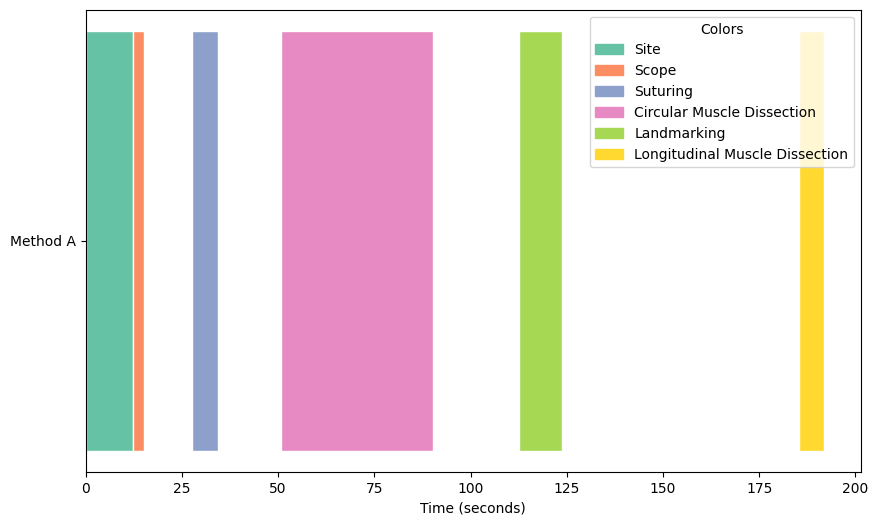

In [ ]:
# import json

# with open('surg-001.json', 'r') as file:
#     data = json.load(file)

# start_times = []
# end_times = []
# phases = []

# for i in range(len(data)):
#     for a in range(len(data[i]["annotations"])):
#         annotations = data[i]["annotations"]
#         start_time = annotations[a]["result"][0]["value"]["start"]
#         end_time = annotations[a]["result"][0]["value"]["end"]
#         phase = annotations[a]["result"][0]["value"]["labels"]
#         phase = phase[0].split(".")[1]

#         start_times.append(start_time)
#         end_times.append(end_time)
#         phases.append(phase)


# phases = set(phases)
# phases = list(phases)
# print("Start Times:", start_times)
# print("End Times:", end_times)
# print("Phases:", phases)



import json
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

with open('surg-001.json', 'r') as file:
    data = json.load(file)

start_times = []
end_times = []
phases = []

offset = 0

for i in range(len(data)):
    for a in range(len(data[i]["annotations"])):
        annotations = data[i]["annotations"]
        start_time = annotations[a]["result"][0]["value"]["start"] + offset
        end_time = annotations[a]["result"][0]["value"]["end"] + offset
        phase = annotations[a]["result"][0]["value"]["labels"]
        phase = phase[0].split(".")[1]

    start_times.append(start_time)
    end_times.append(end_time)
    phases.append(phase)

    offset += end_time - start_time
    # print(f"Video {i+1}: Start: {start_time} End: {end_time}")
    # offset = end_time - start_time
    # print(f"Offset: {offset}")
phases = list(set(phases))
print("Start Times:", start_times)
print("End Times:", end_times)
print("Phases:", phases)


colors = sns.color_palette("Set2", len(phases))

plt.figure(figsize=(10, 6))

bar_width = 0.3

plt.barh("Method A", end_times[0] - start_times[0], left=start_times[0], height=bar_width, color=colors[0], edgecolor='white', label=phases[0])

for i in range(1, len(phases)):
    plt.barh("Method A", end_times[i] - start_times[i], left=np.sum(end_times[:i]), height=bar_width, color=colors[i], edgecolor='white', label=phases[i])

plt.xlabel('Time (seconds)')


legend_handles = [plt.Rectangle((0,0),1,1, color=colors[i], label=phases[i]) for i in range(len(colors))]
plt.legend(handles=legend_handles, title='Colors')

plt.show()

In [ ]:
len(start_times)

11

In [ ]:
phases

['Setup',
 'Setup',
 'Dissection',
 'Dissection',
 'Dissection',
 'Dissection',
 'Dissection',
 'Closure',
 'Closure',
 'Closure',
 'Closure']